<a href="https://colab.research.google.com/github/Antonyraj007/Antony-/blob/main/customer_convention_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np



In [ ]:
df=pd.read_csv("train.csv")
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.describe()


,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.dtypes


age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

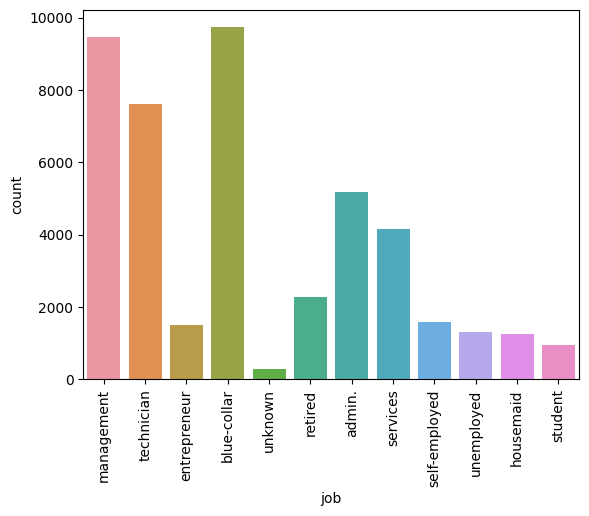

In [ ]:
#we consider unknown as a missing value 
sns.countplot(x=df['job'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
index=df[(df['job']=='unknown')].index
df.drop(index,inplace=True)
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df['marital'].value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

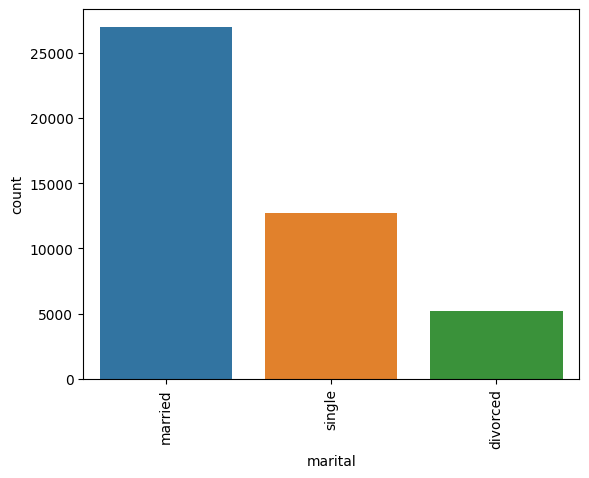

In [ ]:
sns.countplot(x=df['marital'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['education_qual'].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education_qual, dtype: int64

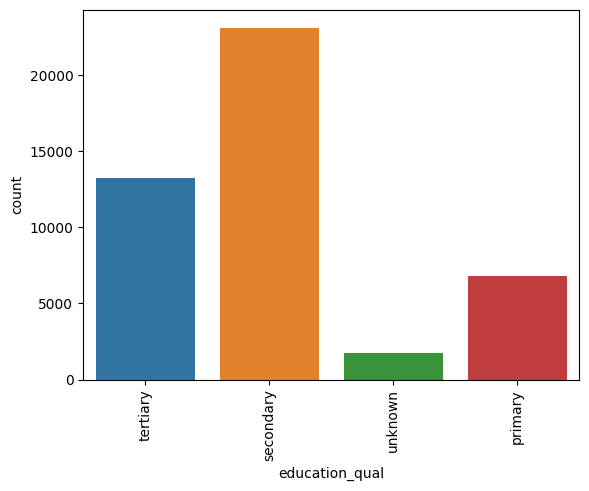

In [ ]:
sns.countplot(x=df['education_qual'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.DataFrame(df[['job','education_qual']]).value_counts()

job            education_qual
management     tertiary          7801
blue-collar    secondary         5371
technician     secondary         5229
admin.         secondary         4219
blue-collar    primary           3758
services       secondary         3457
technician     tertiary          1968
management     secondary         1121
retired        secondary          984
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
student        secondary          508
blue-collar    unknown            454
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
management     unkno

In [ ]:
df.loc[(df['job']=="management") & (df['education_qual']=="unknown"),'education_qual']="tertiary"

df.loc[(df['job']=='blue-collar') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='technician') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='admin.') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='student') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='services') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='retired') & (df['education_qual']=='unknown'),'education_qual']='secondary'

In [ ]:
pd.DataFrame(df[['job','education_qual']]).value_counts()

job            education_qual
management     tertiary          8043
blue-collar    secondary         5825
technician     secondary         5471
admin.         secondary         4390
blue-collar    primary           3758
services       secondary         3607
technician     tertiary          1968
management     secondary         1121
retired        secondary         1103
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
student        secondary          671
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
student        tertiary           223
admin.         prima

In [ ]:
index=df[(df['job']=='unemployed')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

index=df[(df['job']=='housemaid')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

index=df[(df['job']=='self-employed')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

index=df[(df['job']=='entrepreneur')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

In [ ]:
pd.DataFrame(df[['job','education_qual']]).value_counts()

job            education_qual
management     tertiary          8043
blue-collar    secondary         5825
technician     secondary         5471
admin.         secondary         4390
blue-collar    primary           3758
services       secondary         3607
technician     tertiary          1968
management     secondary         1121
retired        secondary         1103
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
student        secondary          671
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
student        tertiary           223
admin.         prima

In [ ]:
df['call_type'].value_counts()#in this case weconsider as a one category not a missing value

cellular     29052
unknown      12846
telephone     2836
Name: call_type, dtype: int64

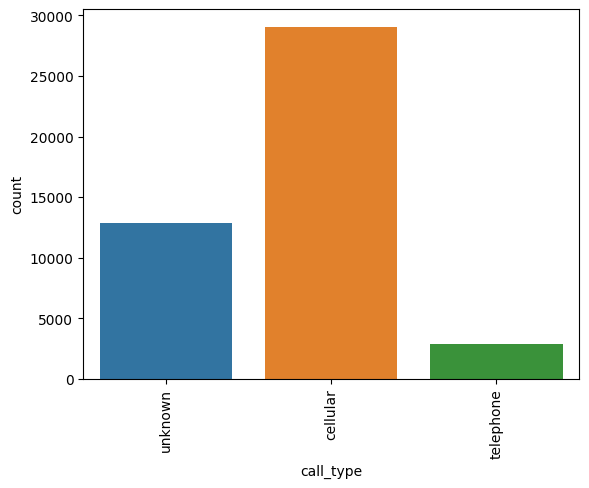

In [ ]:
sns.countplot(x=df['call_type'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['mon'].value_counts()

may    13691
jul     6830
aug     6162
jun     5210
nov     3943
apr     2919
feb     2619
jan     1381
oct      726
sep      566
mar      474
dec      213
Name: mon, dtype: int64

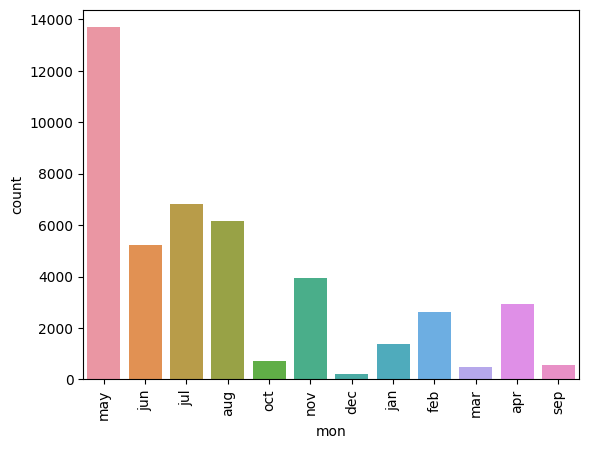

In [ ]:
sns.countplot(x=df['mon'])
plt.xticks(rotation=90)
plt.show()

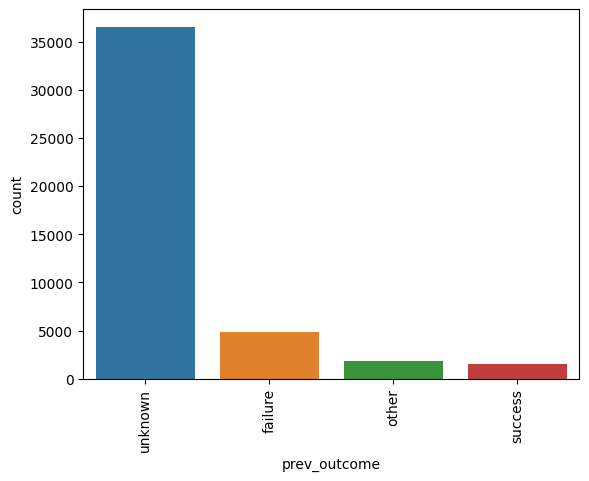

In [ ]:
df['prev_outcome'].value_counts()
sns.countplot(x=df['prev_outcome'])
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'num_calls')

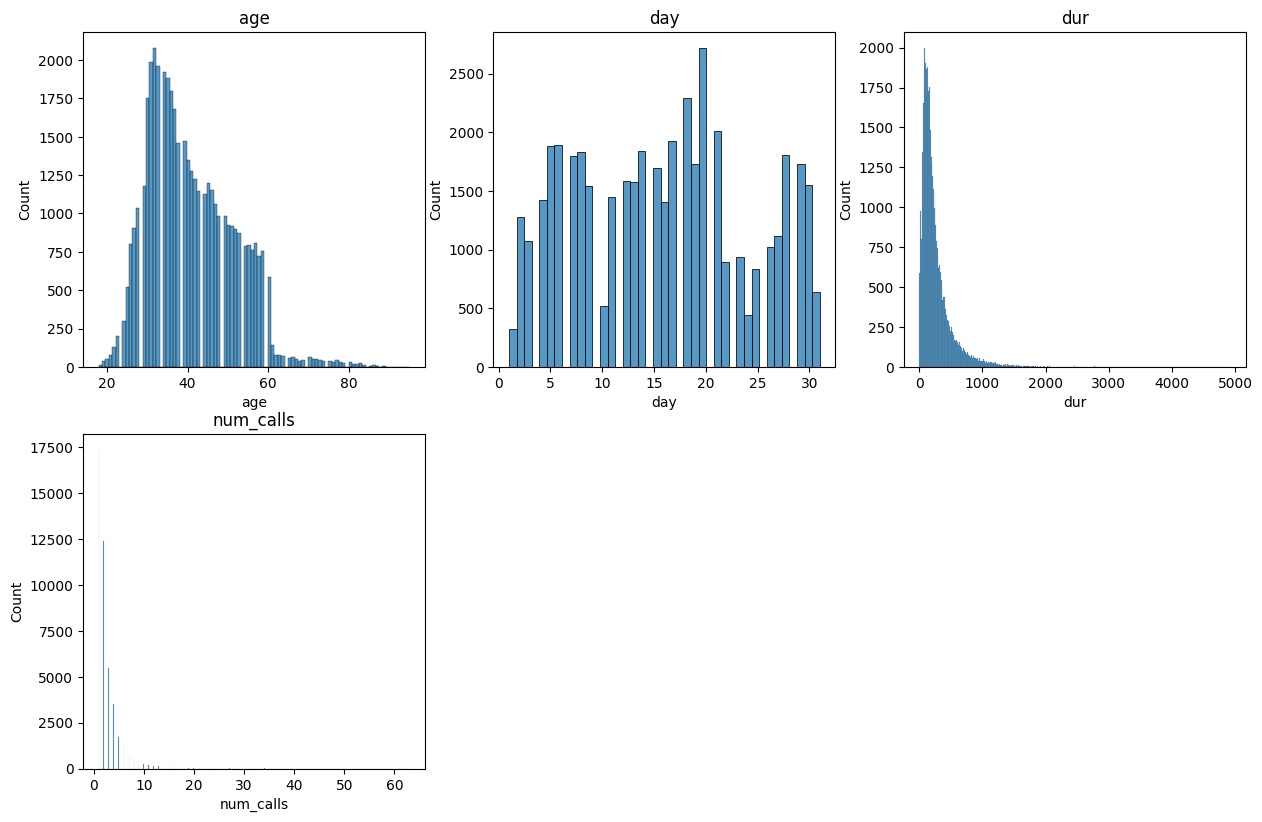

In [ ]:
#ploting for ciontionus variables 
plt.figure(figsize=(15,20))
plt.subplot(431)
sns.histplot(df['age'])
plt.xticks()
plt.title('age')

plt.subplot(432)
sns.histplot(df['day'])
plt.xticks()
plt.title('day')

plt.subplot(433)
sns.histplot(df['dur'])
plt.xticks()
plt.title('dur')

plt.subplot(434)
sns.histplot(df['num_calls'])
plt.xticks()
plt.title('num_calls')


(array([0]), [Text(0, 0, '0')])

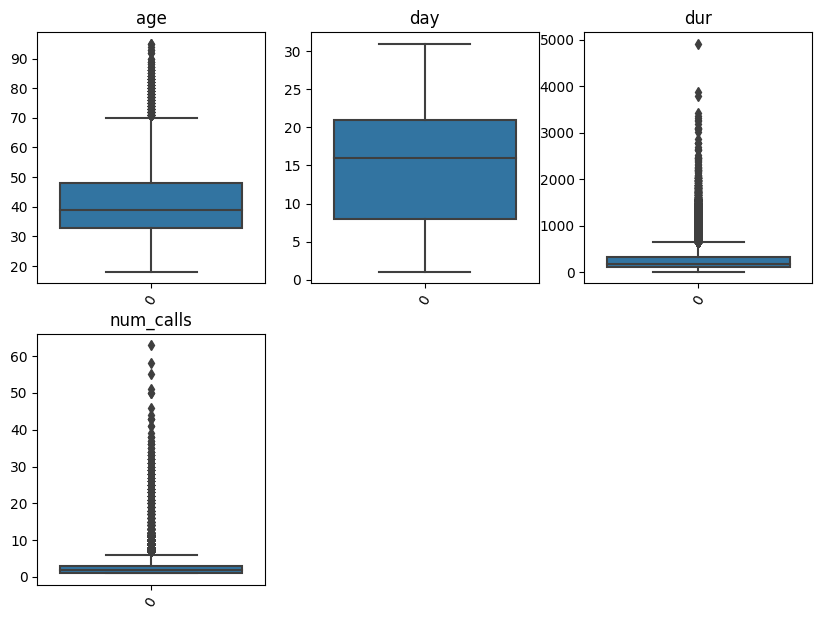

In [ ]:
#find outliers 

plt.figure(figsize=(10,15))

plt.subplot(431)
sns.boxplot(df['age'])
plt.title('age')
plt.xticks(rotation=60)

plt.subplot(432)
sns.boxplot(df['day'])
plt.title('day')
plt.xticks(rotation=60)

plt.subplot(433)
sns.boxplot(df['dur'])
plt.title('dur')
plt.xticks(rotation=60)

plt.subplot(434)
sns.boxplot(df['num_calls'])
plt.title('num_calls')
plt.xticks(rotation=60)


In [ ]:
df.shape

(44734, 11)

In [ ]:
#droping duplicate
df=df.drop_duplicates()
df.shape

(44728, 11)

Text(0.5, 1.0, 'convention according to education_qual')

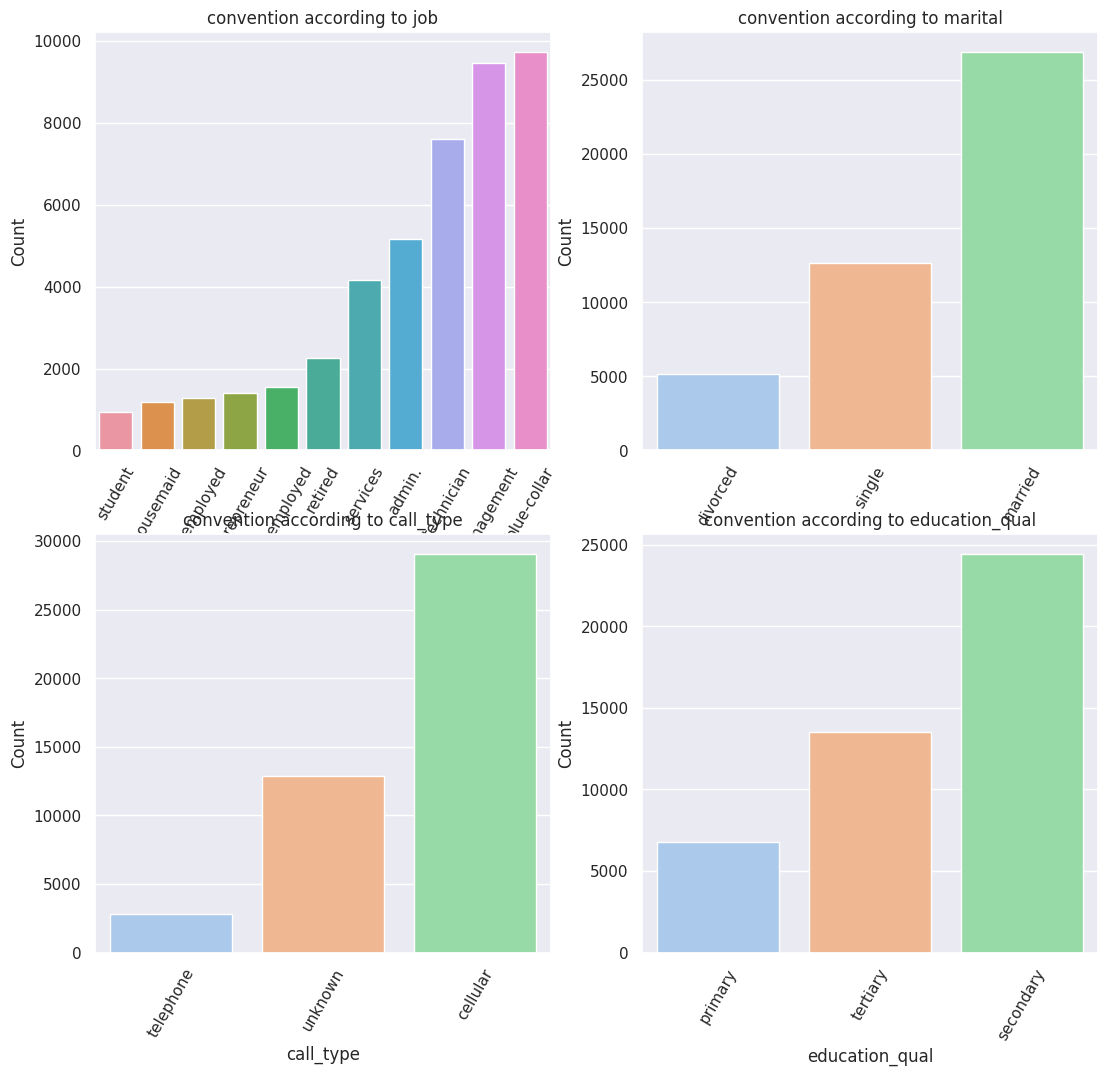

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(x=df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('convention according to job')

plt.subplot(432)
sns.countplot(x=df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('convention according to marital')




plt.subplot(434)
sns.countplot(x=df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('convention according to call_type')



plt.subplot(435)
sns.countplot(x=df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('convention according to education_qual')


Text(0.5, 1.0, 'convention according to mon')

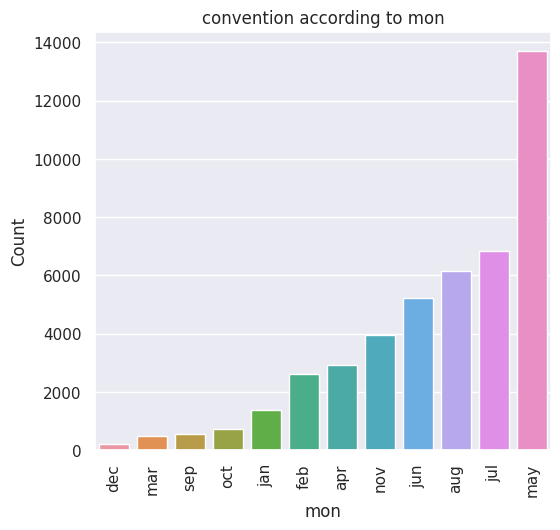

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(435)
sns.countplot(x=df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('convention according to mon')



In [ ]:
#interpretations:
#from above data visualization job,education_qual,mon,call_type having linear relationship with target variable so we can go with label encoding(ordinal)
#martial dont have linear relationship b/w gargetvariable(y) so we can go with OHE




Text(0.5, 1.0, 'mon vs y')

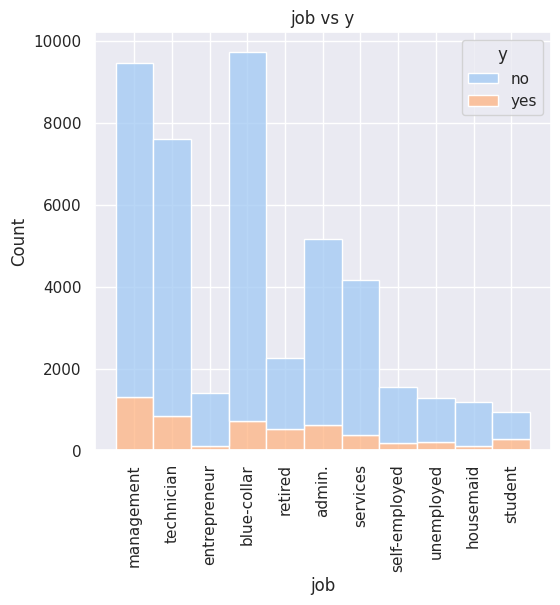

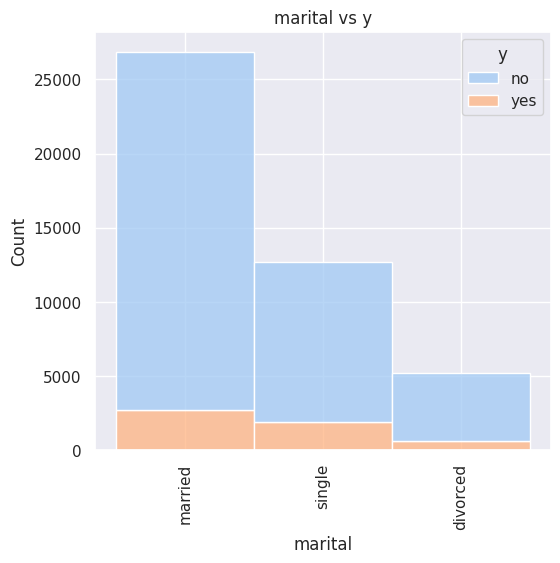

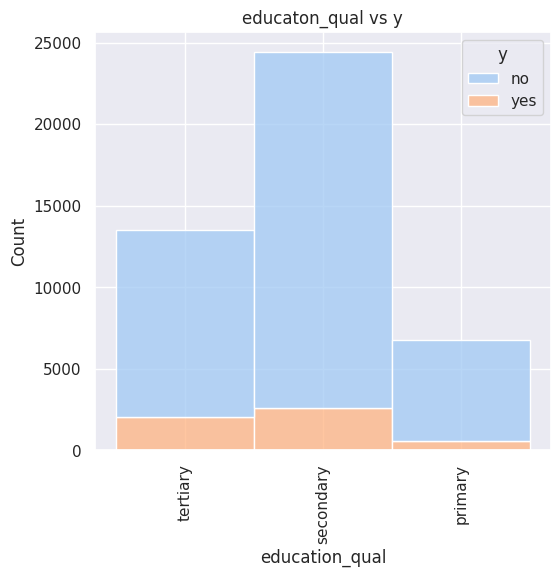

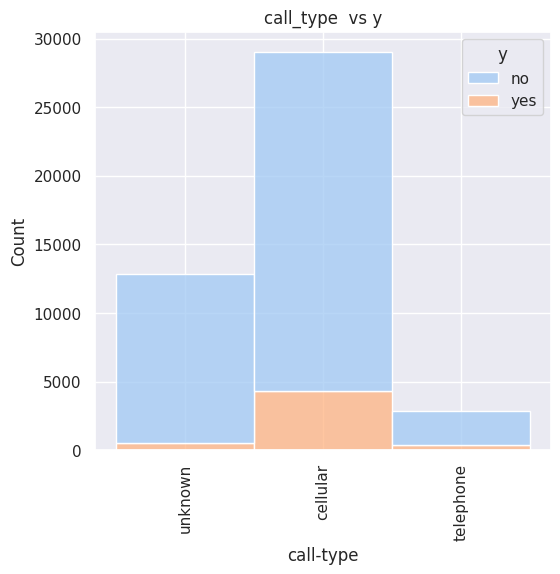

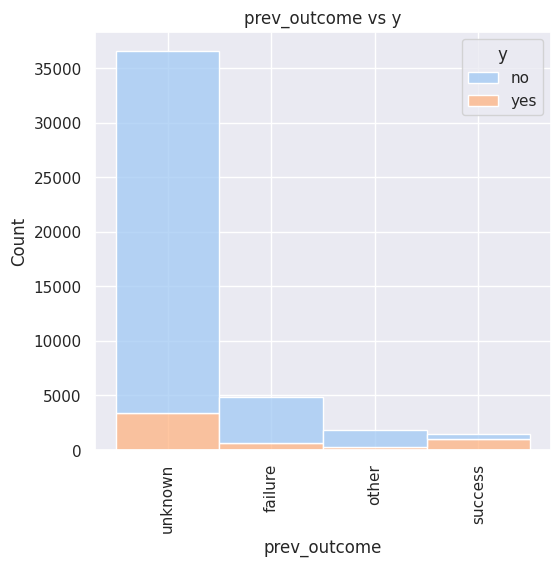

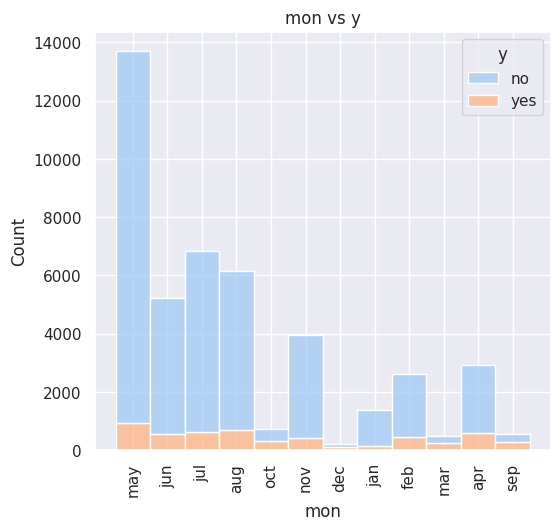

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.histplot(binwidth=0.5,x=df['job'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('job vs y')

plt.figure(figsize=(20,25))
plt.subplot(432)
sns.histplot(binwidth=0.5,x=df['marital'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('marital vs y')

plt.figure(figsize=(20,25))
plt.subplot(433)
sns.histplot(binwidth=0.5,x=df['education_qual'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('educaton_qual vs y')

plt.figure(figsize=(20,25))
plt.subplot(434)
sns.histplot(binwidth=0.5,x=df['call_type'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('call-type')
plt.ylabel('Count')
plt.title('call_type  vs y')

plt.figure(figsize=(20,25))
plt.subplot(435)
sns.histplot(binwidth=0.5,x=df['prev_outcome'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('prev_outcome vs y')

plt.figure(figsize=(20,25))
plt.subplot(436)
sns.histplot(binwidth=0.5,x=df['mon'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('mon vs y')



based on above figure our coonclusion about encoding
job (ordinal encoding order baded on above fig
1.Housemaid,2.entrepreneur,3.self-employed,4.unemployed,5.student,6.serivices,7.retired,8.admin.,9.bluecollar,10.technician,11.Management

education_qual(ordeinal encoding)
1.primary
2.teritary
3.secondary

call_type(ordinal encoding)
1.telephone
2.unknown
3.cellular

mon(ordinal encoding)
1.dec,2.jan,3.Mar,4.sep,5.oct,6.nov7.feb,8.jun,9.april,10.july,11.aug,12.may

prev-outcome(OHE),marital(OHE)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

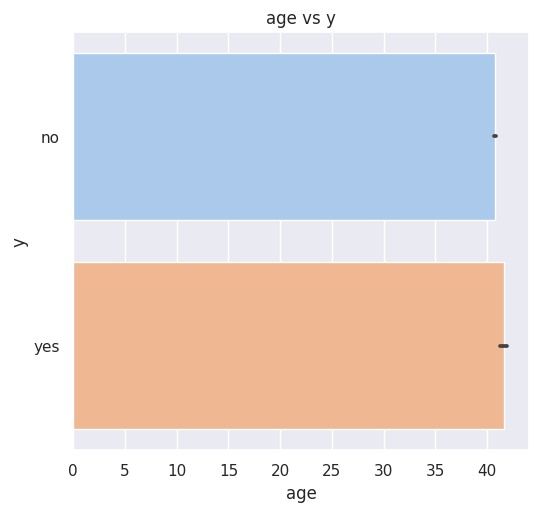

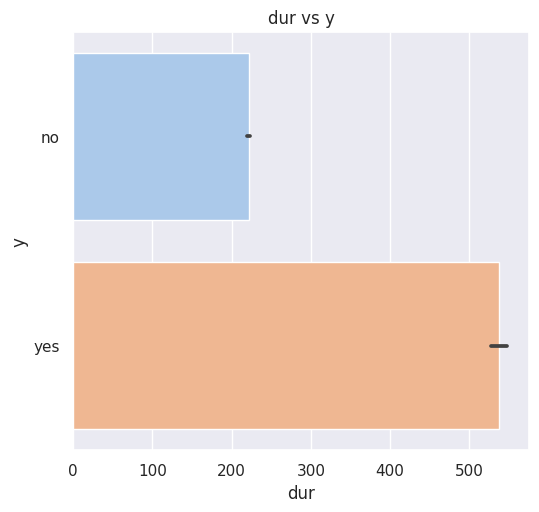

In [ ]:
#ploting continous feature vs y
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.barplot(x=df['age'],y=df['y'])
plt.title('age vs y')
plt.xticks()

plt.figure(figsize=(20,25))
plt.subplot(432)
sns.barplot(x=df['dur'],y=df['y'])
plt.title('dur vs y')
plt.xticks()



above figure based on age increase insurance rate also increase and dur of call increase insurance rate increase


Text(0.5, 1.0, 'num_calls vs y')

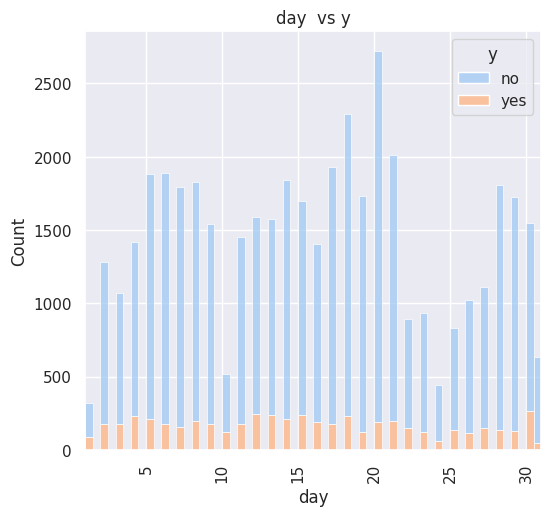

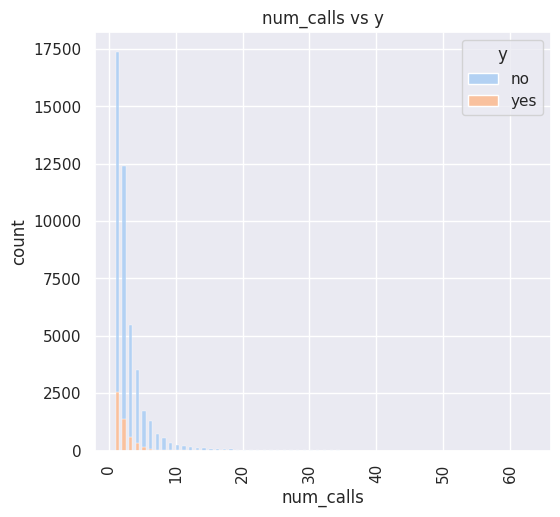

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.histplot(binwidth=0.5,x=df['day'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('day')
plt.ylabel('Count')
plt.title('day  vs y')
plt.xlim(1,31)

plt.figure(figsize=(20,25))
plt.subplot(432)
sns.histplot(binwidth=0.5,x=df['num_calls'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('num_calls')
plt.ylabel('count')
plt.title('num_calls vs y')

based on fig conversion rate was increased on weekend 
no of calls decrase the conversion rate so no of calls inversely propertional to conversion rate  

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no


In [ ]:
#encoding

df['job']=df['job'].map({'housemaid':0,'entrepreneur':1,'self-employed':2,'unemployed':3,'student':4,'services':5,'retired':6,'admin.':7,'blue-collar':8,'technician':9,'management':10})


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,10,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,9,single,secondary,unknown,5,may,151,1,unknown,no
2,33,1,married,secondary,unknown,5,may,76,1,unknown,no
3,47,8,married,secondary,unknown,5,may,92,1,unknown,no
5,35,10,married,tertiary,unknown,5,may,139,1,unknown,no


In [ ]:
df['job']

0        10
1         9
2         1
3         8
5        10
         ..
45206     9
45207     6
45208     6
45209     8
45210     1
Name: job, Length: 44728, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    24427
tertiary     13502
primary       6799
Name: education_qual, dtype: int64

In [ ]:
df['education_qual']=df['education_qual'].map({'primary':0,'tertiary':1,'secondary':2})


In [ ]:
df['education_qual'].value_counts()

2    24427
1    13502
0     6799
Name: education_qual, dtype: int64

In [ ]:
df['call_type'].value_counts()

cellular     29049
unknown      12843
telephone     2836
Name: call_type, dtype: int64

In [ ]:
df['call_type']=df['call_type'].map({'telephone':0,'unknown':1,'cellular':2})

In [ ]:
df['call_type'].value_counts()

2    29049
1    12843
0     2836
Name: call_type, dtype: int64

In [ ]:
df['mon'].value_counts()

may    13690
jul     6829
aug     6160
jun     5208
nov     3943
apr     2919
feb     2619
jan     1381
oct      726
sep      566
mar      474
dec      213
Name: mon, dtype: int64

In [ ]:
df['mon']=df['mon'].map({'dec':0,'jan':1,'mar':2,'sep':3,'oct':4,'nov':5,'feb':6,'jun':7,'apr':8,'jul':9,'aug':10,'may':11})

In [ ]:
df['mon'].value_counts()

11    13690
9      6829
10     6160
7      5208
5      3943
8      2919
6      2619
1      1381
4       726
3       566
2       474
0       213
Name: mon, dtype: int64

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,10,married,1,1,5,11,261,1,unknown,no
1,44,9,single,2,1,5,11,151,1,unknown,no
2,33,1,married,2,1,5,11,76,1,unknown,no
3,47,8,married,2,1,5,11,92,1,unknown,no
5,35,10,married,1,1,5,11,139,1,unknown,no


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,10,married,1,1,5,11,261,1,unknown,no
1,44,9,single,2,1,5,11,151,1,unknown,no
2,33,1,married,2,1,5,11,76,1,unknown,no
3,47,8,married,2,1,5,11,92,1,unknown,no
5,35,10,married,1,1,5,11,139,1,unknown,no


In [ ]:
ohe1=pd.get_dummies(df[["marital"]])
df=df.drop('marital',axis=1)
df=pd.concat([df,ohe1],axis=1)


ohe2=pd.get_dummies(df[["prev_outcome"]])
df=df.drop('prev_outcome',axis=1)
df=pd.concat([df,ohe2],axis=1)

In [ ]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,1,1,5,11,261,1,no,0,1,0,0,0,0,1
1,44,9,2,1,5,11,151,1,no,0,0,1,0,0,0,1
2,33,1,2,1,5,11,76,1,no,0,1,0,0,0,0,1
3,47,8,2,1,5,11,92,1,no,0,1,0,0,0,0,1
5,35,10,1,1,5,11,139,1,no,0,1,0,0,0,0,1


In [ ]:
df["y"]=df["y"].map({'no':0,'yes':1})

In [ ]:
df["y"].value_counts()

0    39493
1     5235
Name: y, dtype: int64

In [ ]:
X=df[[i for i in df.columns if i!="y"]]
y=df["y"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(35782, 15)

In [ ]:
y_train.shape

(35782,)

In [ ]:
X_test.shape

(8946, 15)

In [ ]:
y_test.shape

(8946,)

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)
y_smote.value_counts()

0    31601
1    31601
Name: y, dtype: int64

In [ ]:
X_train=X_smote.copy()
y_train=y_smote.copy()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
#scaling for continous feature

X_train[['age','day','dur','num_calls']]=scaler.fit_transform(X_train[['age','day','dur','num_calls']])


X_test[['age','day','dur','num_calls']]=scaler.fit_transform(X_test[['age','day','dur','num_calls']])



In [ ]:
X_train.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,0.352819,9,2,1,-0.031872,11,-0.578851,-0.125798,0,1,0,0,0,0,1
1,-0.765001,5,2,2,-0.153606,11,0.098829,0.267957,0,1,0,0,1,0,0
2,-0.679015,9,2,2,0.211598,8,-0.912043,-0.519554,0,1,0,0,0,0,1
3,-0.593029,1,2,2,1.185476,9,-0.372723,1.055468,0,0,1,0,0,0,1
4,1.470639,9,0,2,-0.518810,6,-0.200480,1.055468,0,1,0,0,0,0,1


In [ ]:
# logistic regression 
from sklearn.linear_model import LogisticRegression 
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_log=log_regression.predict(X_test)

In [ ]:
log_regression.score(X_train,y_train)

0.8864276446947882

In [ ]:
log_regression.score(X_test,y_test)

0.8411580594679187

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_log_score=cross_val_score(log_regression,X_train,y_train,cv=10)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('cross_val_score',cross_val_log_score.mean())

cross_val_score 0.8830925721775316


In [ ]:
cross_val_log_score.mean()

0.8830925721775316

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7892
           1       0.40      0.70      0.51      1054

    accuracy                           0.84      8946
   macro avg       0.68      0.78      0.71      8946
weighted avg       0.89      0.84      0.86      8946



In [ ]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [ ]:
precision_score(y_test,y_pred_log,average='weighted')

0.8904913989463769

In [ ]:
recall_score(y_test,y_pred_log,average='weighted')

0.8411580594679187

In [ ]:
f1_score(y_test,y_pred_log,average='weighted')

0.8586954596257864

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# KNN clasifier 
knn=KNeighborsClassifier(n_neighbors=10)




In [ ]:
import numpy as np


In [ ]:

cross_val_knn=[]
train_scores=[]
test_scores=[]
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))
  cross_val_knn.append(cross_val_score(knn,X_train,y_train,cv=10).mean())
  
  print('k value is' ,k,'train_score is',knn.score(X_train,y_train),'cross_val_score is',cross_val_score(knn,X_train,y_train,cv=10).mean())



k value is 1 train_score is 1.0 cross_val_score is 0.9215241464557563
k value is 2 train_score is 0.9685452991993925 cross_val_score is 0.9166043192372622
k value is 3 train_score is 0.9595898863960002 cross_val_score is 0.9242610151213857
k value is 4 train_score is 0.9523432802759406 cross_val_score is 0.9206383333433461
k value is 5 train_score is 0.9481978418404481 cross_val_score is 0.9236597367825553
k value is 6 train_score is 0.9439732919844309 cross_val_score is 0.9203374200725329
k value is 7 train_score is 0.9407613683111294 cross_val_score is 0.9202104347773845
k value is 8 train_score is 0.9367741527166862 cross_val_score is 0.9181221651156782
k value is 9 train_score is 0.9355083699882915 cross_val_score is 0.9189129589133269
k value is 10 train_score is 0.9321540457580456 cross_val_score is 0.9157013065750294
k value is 11 train_score is 0.9310781304389102 cross_val_score is 0.9164605248929127
k value is 12 train_score is 0.9291003449257935 cross_val_score is 0.913691845

In [ ]:
#finding k value when k is 

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
train_scores

[1.0,
 0.9685452991993925,
 0.9595898863960002,
 0.9523432802759406,
 0.9481978418404481,
 0.9439732919844309,
 0.9407613683111294,
 0.9367741527166862,
 0.9355083699882915,
 0.9321540457580456,
 0.9310781304389102,
 0.9291003449257935,
 0.9281351855953925,
 0.9258251321160723,
 0.9253821081611341,
 0.9230720546818139,
 0.923293566659283,
 0.9205563115091294,
 0.9208411126230183]

In [ ]:
test_scores

[0.8386988598256204,
 0.8707802369774201,
 0.848312094790968,
 0.8672032193158954,
 0.8471942767717415,
 0.8622848200312989,
 0.844846858931366,
 0.8568075117370892,
 0.8433936955063716,
 0.8527833668678739,
 0.8431701319025263,
 0.8547954393024816,
 0.846411804158283,
 0.8541247484909457,
 0.8475296221775095,
 0.852448021462106,
 0.8461882405544378,
 0.8514419852448022,
 0.8441761681198301]

In [ ]:
cross_val_knn

[0.9215241464557563,
 0.9166043192372622,
 0.9242610151213857,
 0.9206383333433461,
 0.9236597367825553,
 0.9203374200725329,
 0.9202104347773845,
 0.9181221651156782,
 0.9189129589133269,
 0.9157013065750294,
 0.9164605248929127,
 0.9136918454458616,
 0.9146093291599833,
 0.9120463058641178,
 0.9126473764365917,
 0.9102425759824093,
 0.9110968211246819,
 0.9089134870904502,
 0.9097835399982778]

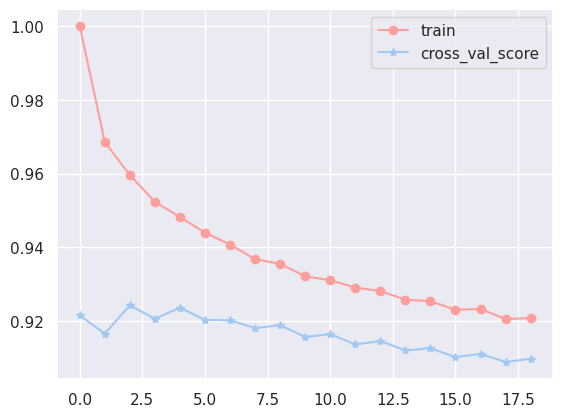

In [ ]:
#find the best k value
import matplotlib.pyplot as plt
plt.plot(train_scores,'ro-',label='train')
plt.plot(cross_val_knn,'b*-',label='cross_val_score')
plt.legend()

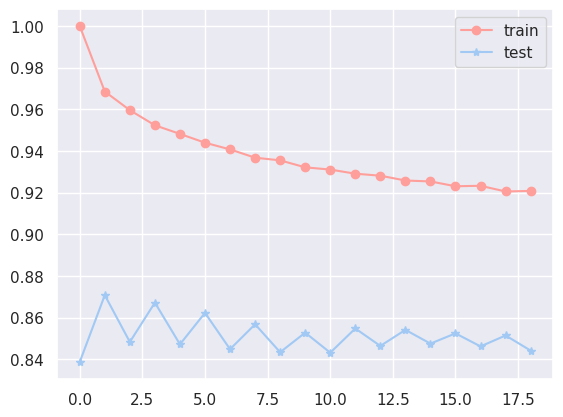

In [ ]:
#find the best k value
import matplotlib.pyplot as plt
plt.plot(train_scores,'ro-',label='train')
plt.plot(test_scores,'b*-',label='test')
plt.legend()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cross_val_tree=[]
train_tree=[]
test_score_tree=[]
max_depth=np.arange(1,20)
for d in max_depth:
  dt=DecisionTreeClassifier(max_depth=d,random_state=10,)
  dt.fit(X_train,y_train)
  print('depth_value is',d,'train_score_dt is',dt.score(X_train,y_train),'cross_val_score_dt is',cross_val_score(dt,X_train,y_train).mean())
  train_tree.append(dt.score(X_train,y_train))
  test_score_tree.append(dt.score(X_test,y_test))
  cross_val_tree.append(cross_val_score(dt,X_train,y_train).mean())




depth_value is 1 train_score_dt is 0.7184582766368153 cross_val_score_dt is 0.7186480988124837
depth_value is 2 train_score_dt is 0.7272554665991583 cross_val_score_dt is 0.7378718686131825
depth_value is 3 train_score_dt is 0.830400936679219 cross_val_score_dt is 0.828946098139568
depth_value is 4 train_score_dt is 0.8491819879117749 cross_val_score_dt is 0.8462873721134463
depth_value is 5 train_score_dt is 0.859387361159457 cross_val_score_dt is 0.8592457209261806
depth_value is 6 train_score_dt is 0.8701781589190215 cross_val_score_dt is 0.8644513157407232
depth_value is 7 train_score_dt is 0.885763108762381 cross_val_score_dt is 0.8735493606798853
depth_value is 8 train_score_dt is 0.9008733900825924 cross_val_score_dt is 0.8861282067393723
depth_value is 9 train_score_dt is 0.9120913895129901 cross_val_score_dt is 0.8920616083489629
depth_value is 10 train_score_dt is 0.9245435271035727 cross_val_score_dt is 0.897488653307151
depth_value is 11 train_score_dt is 0.935619125977026 

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
dt.get_depth()

19

In [ ]:
dt.tree_.node_count

8143

In [ ]:
train_tree

[0.7184582766368153,
 0.7272554665991583,
 0.830400936679219,
 0.8491819879117749,
 0.859387361159457,
 0.8701781589190215,
 0.885763108762381,
 0.9008733900825924,
 0.9120913895129901,
 0.9245435271035727,
 0.935619125977026,
 0.9465839688617449,
 0.9573905889054144,
 0.9675959621530964,
 0.9771209771842663,
 0.9836714028037088,
 0.9894148919337996,
 0.9936236195057119,
 0.9960286066896618]

In [ ]:
test_score_tree

[0.46534764140397944,
 0.40990386765034653,
 0.7946568298680975,
 0.7246814218645204,
 0.776436396154706,
 0.780236977420076,
 0.799575229152694,
 0.8202548625083836,
 0.827073552425665,
 0.8191370444891571,
 0.8177956628660854,
 0.818578135479544,
 0.8176838810641628,
 0.8164542812430137,
 0.8110887547507266,
 0.8108651911468813,
 0.8107534093449587,
 0.8072881734853565,
 0.8079588642968925]

In [ ]:
cross_val_tree

[0.7186480988124837,
 0.7378718686131825,
 0.828946098139568,
 0.8462873721134463,
 0.8592457209261806,
 0.8644513157407232,
 0.8735493606798853,
 0.8861282067393723,
 0.8920616083489629,
 0.897488653307151,
 0.9002575304990093,
 0.9033429222171374,
 0.9061909421222284,
 0.907567551938188,
 0.908611848225435,
 0.9095611765112318,
 0.9090390784357509,
 0.9105263025477675,
 0.9099409271017855]

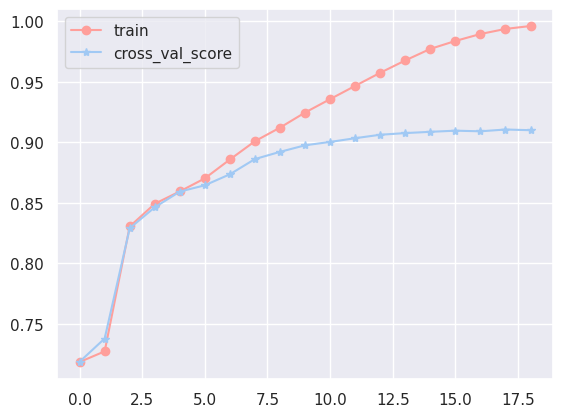

In [ ]:
plt.plot(train_tree,'ro-',label='train')
plt.plot(cross_val_tree,'b*-',label='cross_val_score')
plt.legend()

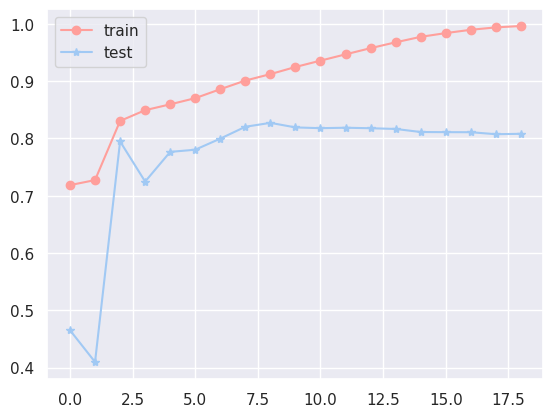

In [ ]:
plt.plot(train_tree,'ro-',label='train')
plt.plot(test_score_tree,'b*-',label='test')
plt.legend()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'dur <= -0.49\ngini = 0.5\nsamples = 63202\nvalue = [31601, 31601]'),
 Text(0.25, 0.7, 'prev_outcome_unknown <= 0.5\ngini = 0.348\nsamples = 25011\nvalue = [19409, 5602]'),
 Text(0.125, 0.5, 'prev_outcome_failure <= 0.5\ngini = 0.497\nsamples = 6834\nvalue = [3139, 3695]'),
 Text(0.0625, 0.3, 'prev_outcome_other <= 0.5\ngini = 0.349\nsamples = 4510\nvalue = [1014, 3496]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'dur <= -0.719\ngini = 0.157\nsamples = 2324\nvalue = [2125, 199]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'mon <= 8.5\ngini = 0.188\nsamples = 18177\nvalue = [16270, 1907]'),
 Text(0.3125, 0.3, 'dur <= -0.758\ngini = 0.359\nsamples = 7285\nvalue = [5580, 1705]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'age <= 3.491\ngini = 0.036\nsamples = 10892\nvalue = [10690, 202]'),
 Text(0.40625, 0.1, '\n  (.

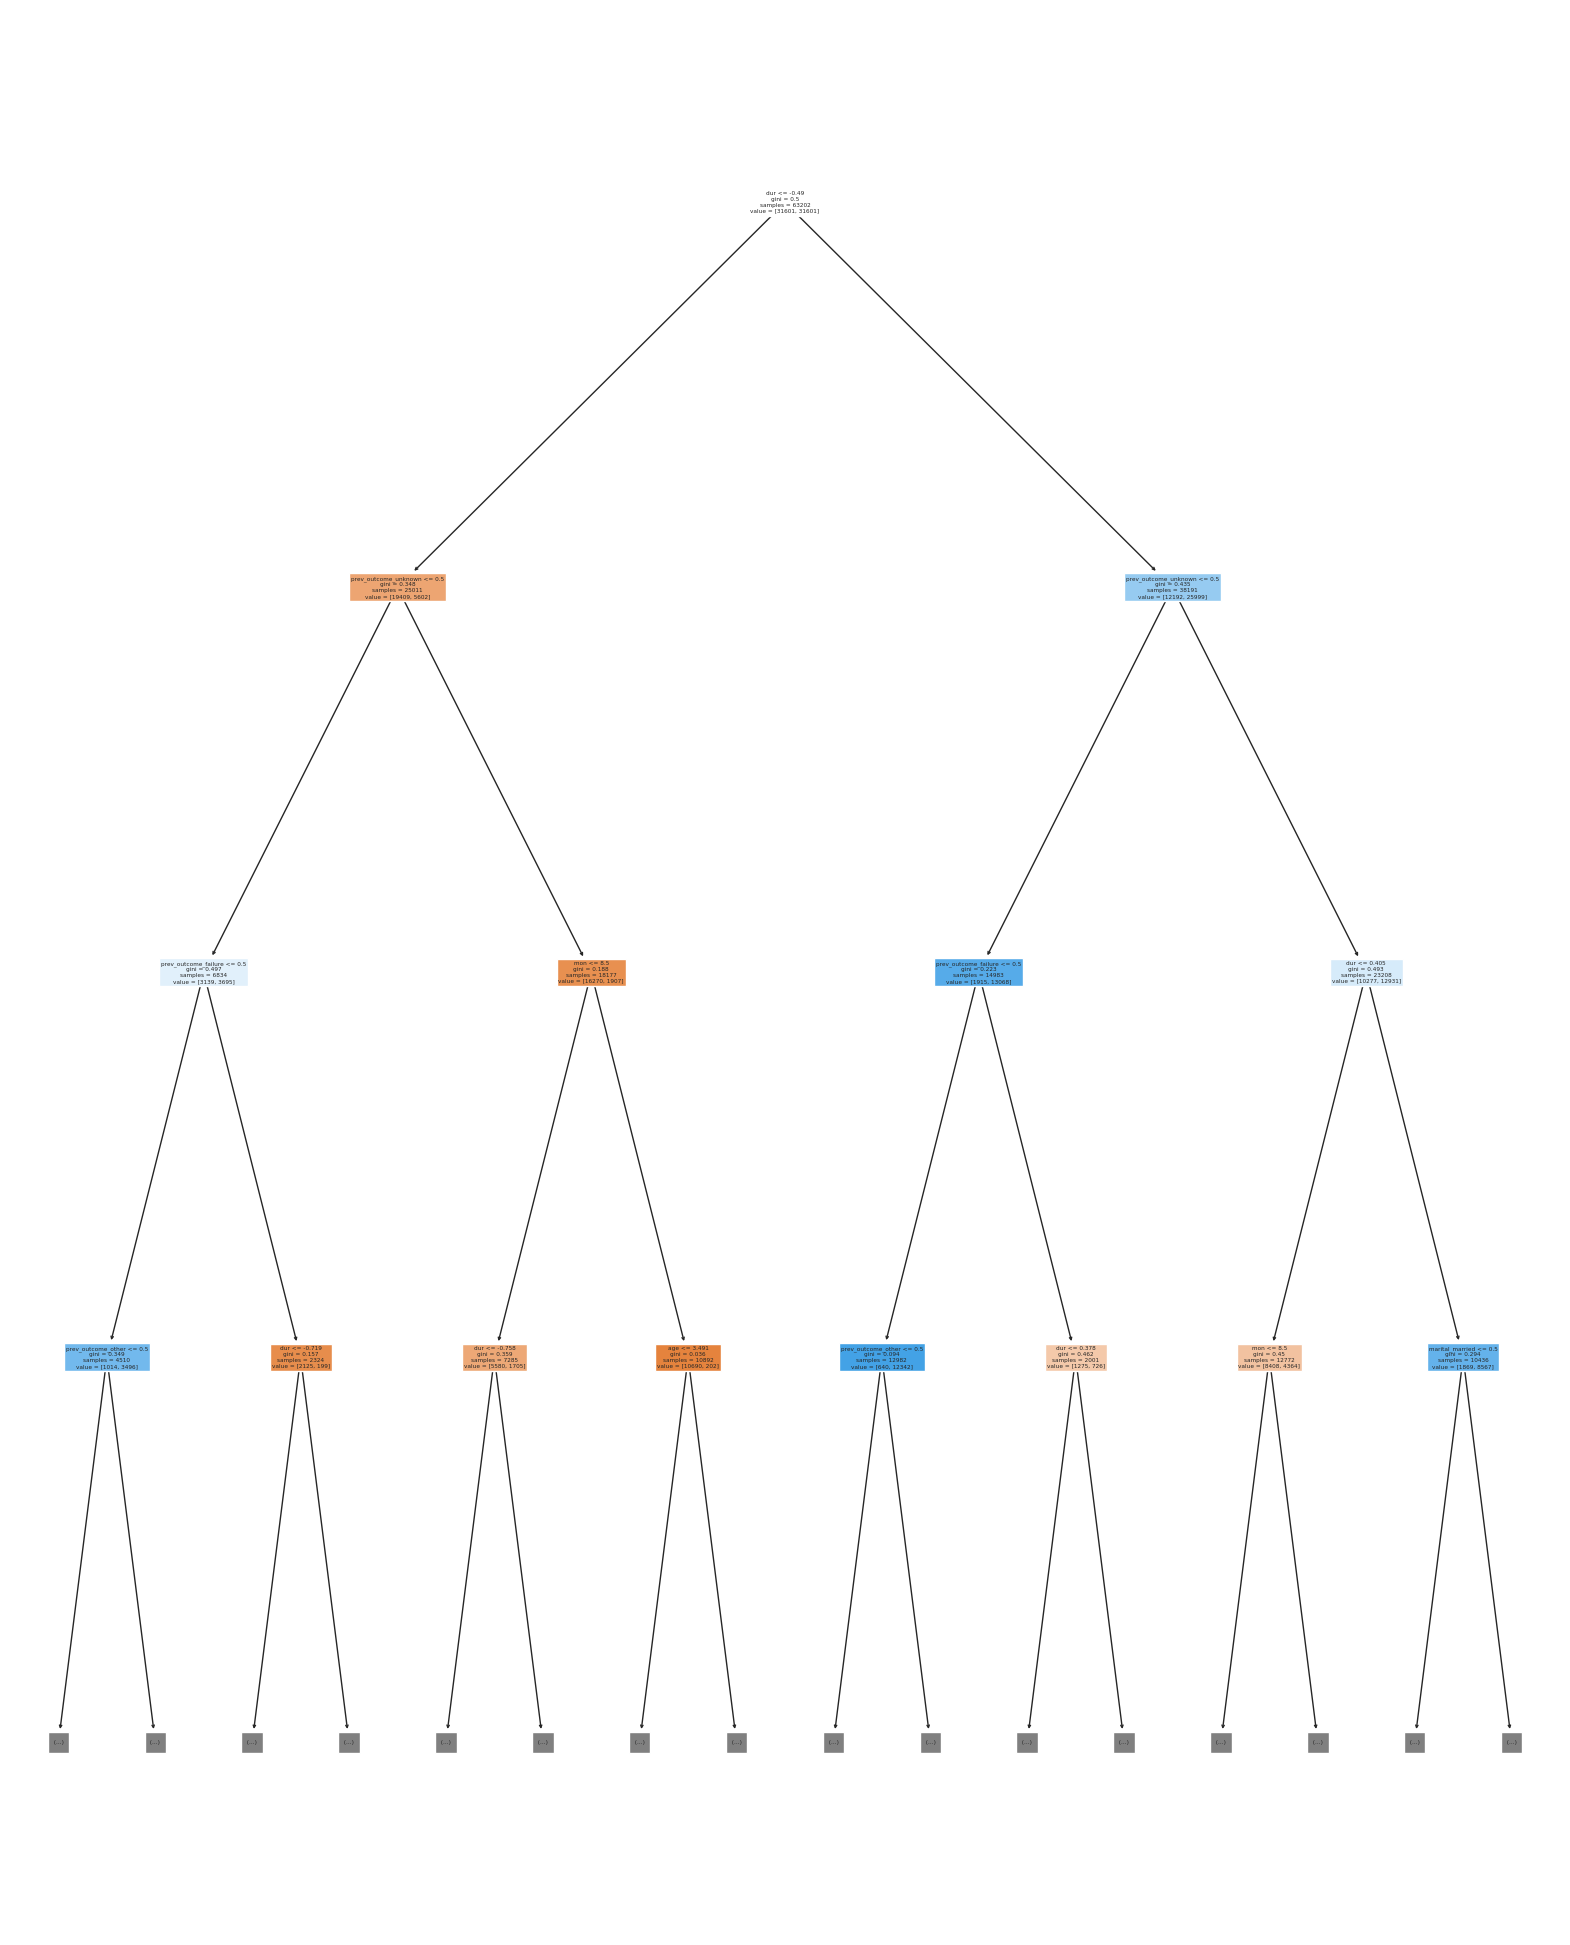

In [ ]:
plt.figure(figsize=(20,25))
plot_tree(dt,max_depth=3,filled=True,feature_names=X_train.columns)


In [ ]:
#Random forest Classifier
from  sklearn.ensemble import RandomForestClassifier

max_depth=np.arange(1,21)
rfc_train_score=[]
rfc_test_score=[]
rfc_cross_val_score=[]
for d in max_depth:
  rfc=RandomForestClassifier(max_depth=d,random_state=10)
  rfc.fit(X_train,y_train)
  print('depth_value is',d,'train_score',rfc.score(X_train,y_train),'cross_val_score_rfc is',cross_val_score(rfc,X_train,y_train).mean())
  rfc_train_score.append(rfc.score(X_train,y_train))
  rfc_test_score.append(rfc.score(X_test,y_test))
  rfc_cross_val_score.append(cross_val_score(rfc,X_train,y_train).mean())


depth_value is 1 train_score 0.7941046169425018 cross_val_score_rfc is 0.7967790412751754
depth_value is 2 train_score 0.8449099712034429 cross_val_score_rfc is 0.8419519102999182
depth_value is 3 train_score 0.8595139394322965 cross_val_score_rfc is 0.8556066331276868
depth_value is 4 train_score 0.8704471377488054 cross_val_score_rfc is 0.8660811189028269
depth_value is 5 train_score 0.8784848580741116 cross_val_score_rfc is 0.8730270911210157
depth_value is 6 train_score 0.8904148602892313 cross_val_score_rfc is 0.8828528777666402
depth_value is 7 train_score 0.9021866396633018 cross_val_score_rfc is 0.8904950575232892
depth_value is 8 train_score 0.9115376095693174 cross_val_score_rfc is 0.8950678298163801
depth_value is 9 train_score 0.9209202240435429 cross_val_score_rfc is 0.8998145914089075
depth_value is 10 train_score 0.9301446156767191 cross_val_score_rfc is 0.9059694519240686
depth_value is 11 train_score 0.9405556786177652 cross_val_score_rfc is 0.9102573515053989
depth_va

In [ ]:
y_pred_rfc=rfc.predict(X_test)

In [ ]:
rfc_train_score

[0.7941046169425018,
 0.8449099712034429,
 0.8595139394322965,
 0.8704471377488054,
 0.8784848580741116,
 0.8904148602892313,
 0.9021866396633018,
 0.9115376095693174,
 0.9209202240435429,
 0.9301446156767191,
 0.9405556786177652,
 0.9489731337615899,
 0.958656371633809,
 0.9677541849941458,
 0.9767412423657479,
 0.9843042941679061,
 0.9894465365020094,
 0.9936710863580266,
 0.9968038986108034,
 0.9982437264643524]

In [ ]:
rfc_test_score

[0.6438631790744467,
 0.7027721886876817,
 0.741001564945227,
 0.7686116700201208,
 0.7665995975855131,
 0.7864967583277442,
 0.8020344287949922,
 0.8120947909680304,
 0.8180192264699307,
 0.8211491169237648,
 0.8307623518891124,
 0.8343393695506371,
 0.8401520232506148,
 0.8458528951486698,
 0.8466353677621283,
 0.8508830762351889,
 0.8536776212832551,
 0.8561368209255533,
 0.8545718756986362,
 0.8560250391236307]

In [ ]:
rfc_cross_val_score

[0.7967790412751754,
 0.8419519102999182,
 0.8556066331276868,
 0.8660811189028269,
 0.8730270911210157,
 0.8828528777666402,
 0.8904950575232892,
 0.8950678298163801,
 0.8998145914089075,
 0.9059694519240686,
 0.9102573515053989,
 0.9153521492751635,
 0.9183109299256289,
 0.921649463670055,
 0.9240861024354146,
 0.9266651337470299,
 0.9277094137621302,
 0.9288328102046887,
 0.93000367249827,
 0.9303517762675002]

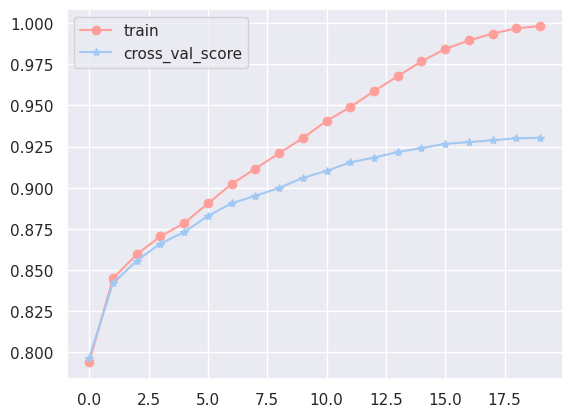

In [ ]:
plt.plot(rfc_train_score,'ro-',label='train')
plt.plot(rfc_cross_val_score,'b*-',label='cross_val_score')
plt.legend()

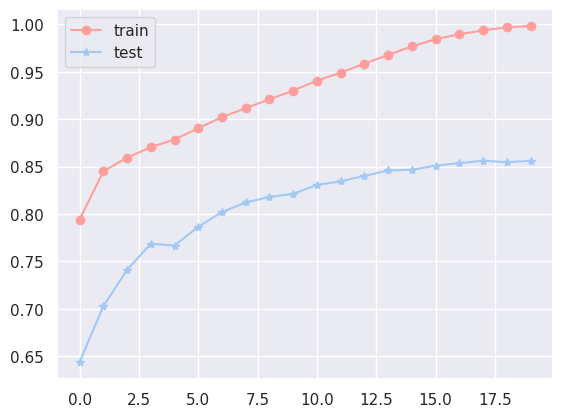

In [ ]:
plt.plot(rfc_train_score,'ro-',label='train')
plt.plot(rfc_test_score,'b*-',label='test')
plt.legend()

In [ ]:
#gradient Boosting Technique

In [ ]:
import xgboost as xgb
cross_value_xgb=[]
train_score_xgb=[]
test_score_xgb=[]
max_depth=np.arange(1,21)
for d in max_depth:
  xgb_classifier=xgb.XGBClassifier(learning_rate=(0.1),n_estimators=100,random_state=0,max_depth=d)
  xgb_classifier.fit(X_train,y_train)
  print('max_depth is',d,'train_score',xgb_classifier.score(X_train,y_train),'cross_val_score',cross_val_score(xgb_classifier,X_train,y_train).mean())
  train_score_xgb.append(xgb_classifier.score(X_train,y_train))
  test_score_xgb.append(xgb_classifier.score(X_test,y_test))
  cross_value_xgb.append(cross_val_score(xgb_classifier,X_train,y_train).mean())


max_depth is 1 train_score 0.8693712224296699 cross_val_score 0.8651159190157806
max_depth is 2 train_score 0.8990221828423152 cross_val_score 0.8892926911025907
max_depth is 3 train_score 0.9130881934116009 cross_val_score 0.8999254873382674
max_depth is 4 train_score 0.9222334736242523 cross_val_score 0.9057323216898199
max_depth is 5 train_score 0.9298756368469352 cross_val_score 0.9103049775744789
max_depth is 6 train_score 0.9384987816841239 cross_val_score 0.9133428846660305
max_depth is 7 train_score 0.9471377488054176 cross_val_score 0.9176148951222614
max_depth is 8 train_score 0.958197525394766 cross_val_score 0.9202097579806117
max_depth is 9 train_score 0.968640232904022 cross_val_score 0.9237539816690516
max_depth is 10 train_score 0.9780703142305623 cross_val_score 0.9256051773964366
max_depth is 11 train_score 0.986234612828708 cross_val_score 0.9271715842762
max_depth is 12 train_score 0.9915034334356507 cross_val_score 0.928959510143305
max_depth is 13 train_score 0.99

In [ ]:
train_score_xgb

[0.8693712224296699,
 0.8990221828423152,
 0.9130881934116009,
 0.9222334736242523,
 0.9298756368469352,
 0.9384987816841239,
 0.9471377488054176,
 0.958197525394766,
 0.968640232904022,
 0.9780703142305623,
 0.986234612828708,
 0.9915034334356507,
 0.9952216702003102,
 0.9975000791114206,
 0.998575994430556,
 0.9993354640675928,
 0.9995727983291668,
 0.9996835543179013,
 0.9998101325907408,
 0.9998734217271605]

In [ ]:
test_score_xgb

[0.7810194500335346,
 0.8128772635814889,
 0.8285267158506595,
 0.8362396601833222,
 0.8421640956852224,
 0.8419405320813772,
 0.8470824949698189,
 0.8509948580371116,
 0.8527833668678739,
 0.852448021462106,
 0.8533422758774871,
 0.8534540576794097,
 0.8554661301140174,
 0.8562486027274759,
 0.854012966689023,
 0.8556896937178627,
 0.8569192935390119,
 0.858148893360161,
 0.8571428571428571,
 0.8564721663313213]

In [ ]:
y_pred_xgb=xgb_classifier.predict(X_test)

In [ ]:
cross_value_xgb

[0.8651159190157806,
 0.8892926911025907,
 0.8999254873382674,
 0.9057323216898199,
 0.9103049775744789,
 0.9133428846660305,
 0.9176148951222614,
 0.9202097579806117,
 0.9237539816690516,
 0.9256051773964366,
 0.9271715842762,
 0.928959510143305,
 0.9288804137431044,
 0.9298772191452567,
 0.9301145621691121,
 0.9303993435065123,
 0.9302411244203361,
 0.9302253254178938,
 0.930699978921312,
 0.930272797527435]

In [ ]:
test_score_xgb

[0.7810194500335346,
 0.8128772635814889,
 0.8285267158506595,
 0.8362396601833222,
 0.8421640956852224,
 0.8419405320813772,
 0.8470824949698189,
 0.8509948580371116,
 0.8527833668678739,
 0.852448021462106,
 0.8533422758774871,
 0.8534540576794097,
 0.8554661301140174,
 0.8562486027274759,
 0.854012966689023,
 0.8556896937178627,
 0.8569192935390119,
 0.858148893360161,
 0.8571428571428571,
 0.8564721663313213]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_classifier=xgb.XGBClassifier(random_state=10)
xgb_classifier.fit(X_train,y_train)
print('cross_val_score is',cross_val_score(xgb_classifier,X_train,y_train).mean())
params={'n_estimators':[100],'learning_rate':[0.05,0.1,0.2,0.3,0.4,0.5]}
gscv=GridSearchCV(xgb_classifier,params,cv=5)
gscv.fit(X_train,y_train)
print('train_score',gscv.score(X_train,y_train))
print('test_score',gscv.score(X_test,y_test))
print(gscv.best_params_)


cross_val_score is 0.9206053676553789
train_score 0.9706813075535584
test_score 0.8458528951486698
{'learning_rate': 0.5, 'n_estimators': 100}


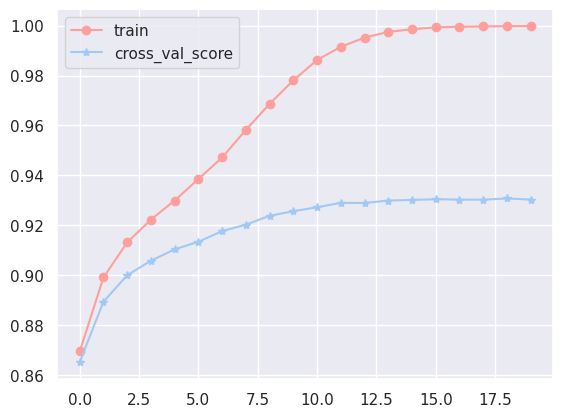

In [ ]:
plt.plot(train_score_xgb,'ro-',label='train')
plt.plot(cross_value_xgb,'b*-',label='cross_val_score')
plt.legend()

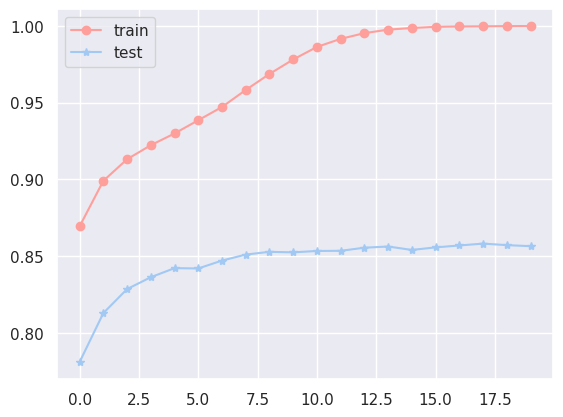

In [ ]:
plt.plot(train_score_xgb,'ro-',label='train')
plt.plot(test_score_xgb,'b*-',label='test')
plt.legend()

In [ ]:
#cross_validation_score
 

In [ ]:
#accuracy,f1_score,Au-Roc
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
#confusion_matrix:
conf_log=confusion_matrix(y_test,y_pred_log)
conf_knn=confusion_matrix(y_test,y_pred_knn)
conf_dtc=confusion_matrix(y_test,y_pred_dt)
conf_rfc=confusion_matrix(y_test,y_pred_rfc)
conf_xgb=confusion_matrix(y_test,y_pred_xgb)

print('confusion_matrix for logistic regreesion is',conf_log)
print('confusion_matrix for KNeighbors is',conf_knn)
print('confusion_matrix for decisiontree is',conf_dtc)
print('confusion_matrix for random_forest is',conf_rfc)
print('confusion_matrix for xgb is',conf_xgb)


print('accuracy for logistic_regression is',accuracy_score(y_test,y_pred_log))
print('accuracy for KNeighbors is',accuracy_score(y_test,y_pred_knn))
print('accuracy for decision_tree is',accuracy_score(y_test,y_pred_dt))
print('accuracy for randomforest is',accuracy_score(y_test,y_pred_rfc))
print('accuracy for xgboost is',accuracy_score(y_test,y_pred_xgb))

print('AU-Roc for logistic_regression is',roc_auc_score(y_test,log_regression.predict_proba(X_test)[:,1]))
print('AU-Roc for KNeighbors is',roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))
print('AU-Roc for DecisionTree is',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1]))
print('AU-Roc for RandomForest is',roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))
print('AU-Roc for Xgboost is',roc_auc_score(y_test,xgb_classifier.predict_proba(X_test)[:,1]))




confusion_matrix for logistic regreesion is [[6784 1108]
 [ 313  741]]
confusion_matrix for KNeighbors is [[6728 1164]
 [ 230  824]]
confusion_matrix for decisiontree is [[6622 1270]
 [ 448  606]]
confusion_matrix for random_forest is [[6919  973]
 [ 315  739]]
confusion_matrix for xgb is [[6930  962]
 [ 322  732]]
accuracy for logistic_regression is 0.8411580594679187
accuracy for KNeighbors is 0.8441761681198301
accuracy for decision_tree is 0.8079588642968925
accuracy for randomforest is 0.8560250391236307
accuracy for xgboost is 0.8564721663313213
AU-Roc for logistic_regression is 0.869222646140352
AU-Roc for KNeighbors is 0.8974006656273352
AU-Roc for DecisionTree is 0.7020138328535803
AU-Roc for RandomForest is 0.8989178867269813
AU-Roc for Xgboost is 0.9009930431797002


In [ ]:
#based on Au-Roc score Xg boosting having good score


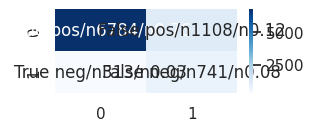

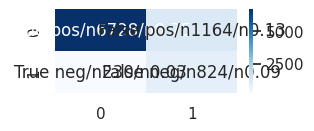

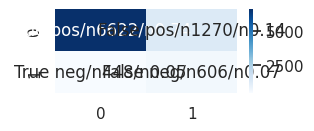

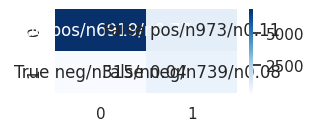

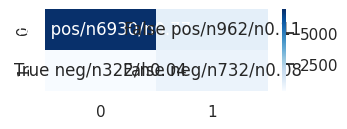

In [ ]:
i=431
for cm in [conf_log,conf_knn,conf_dtc,conf_rfc,conf_xgb]:
  group_name=["True pos",'False pos','True neg','False neg']
  group_counts=["{0:0.0f}".format(value)for value in cm.flatten()]
  group_per=["{0:.2f}".format(i)for i in cm.flatten()/np.sum(cm)]
  labels=[f'{v1}/n{v2}/n{v3}'for v1,v2,v3 in zip (group_name,group_counts,group_per)]
  labels=np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(10,5))
  plt.subplot(i)
  sns.heatmap(cm,annot=labels,fmt="",cmap="Blues")
  i=i+1

plt.tight_layout()

In [ ]:
print(dt.feature_importances_)

[0.06324746 0.0291928  0.02168153 0.01369722 0.06304122 0.09684676
 0.38179629 0.02068791 0.01845646 0.02028562 0.01486421 0.08505437
 0.04811397 0.0048001  0.11823409]


In [ ]:
importances=dt.feature_importances_

In [ ]:
#feature_importance
df1=pd.DataFrame({'feature_names':X.columns,'importances':dt.feature_importances_})
df1

,feature_names,importances
0,age,0.063247
1,job,0.029193
2,education_qual,0.021682
3,call_type,0.013697
4,day,0.063041
5,mon,0.096847
6,dur,0.381796
7,num_calls,0.020688
8,marital_divorced,0.018456
9,marital_married,0.020286


In [ ]:
df1.sort_values(by='importances',ascending=False)


,feature_names,importances
6,dur,0.381796
14,prev_outcome_unknown,0.118234
5,mon,0.096847
11,prev_outcome_failure,0.085054
0,age,0.063247
4,day,0.063041
12,prev_outcome_other,0.048114
1,job,0.029193
2,education_qual,0.021682
7,num_calls,0.020688


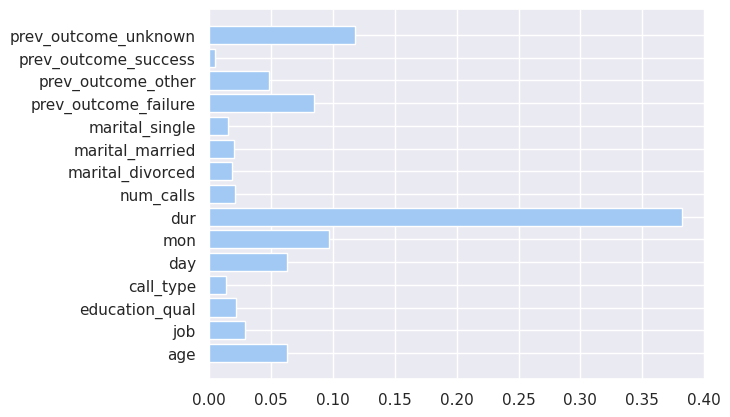

In [ ]:
plt.barh(df1['feature_names'],df1['importances'],align='center')
plt.xticks()
plt.show()

In [ ]:
importance=rfc.feature_importances_

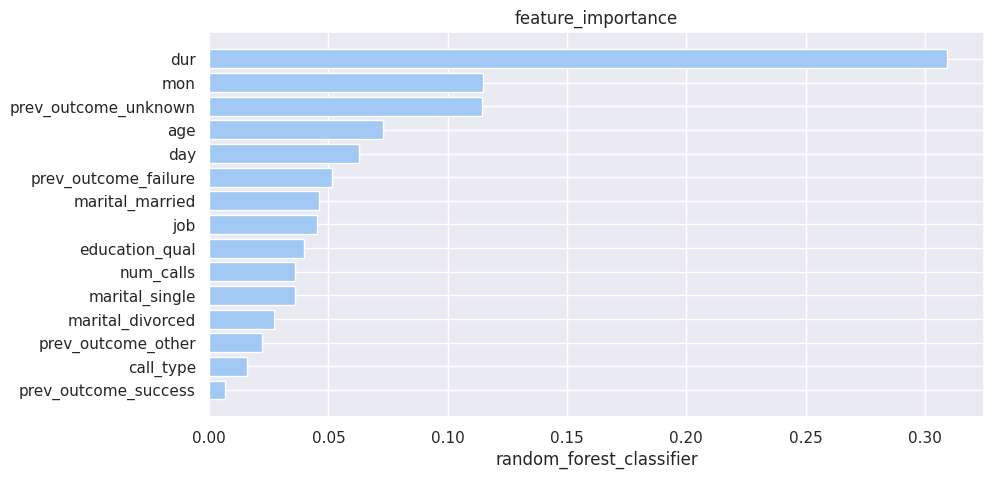

In [ ]:
sorted_index=rfc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X_train.columns[sorted_index],rfc.feature_importances_[sorted_index])
plt.title('feature_importance')
plt.xlabel('random_forest_classifier')
plt.show()